In [1]:
%matplotlib inline

import os, sys, time
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def print_progress(cnt, total):
    """
    Display a progress bar.
    """
    assert(cnt > 0 and total > 0 and cnt <= total)
    length = 80
    ratio = cnt / total
    n = int(length * ratio)
    sys.stdout.write('\r[%-80s] %d%%' % ('-'*n, int(ratio*100)))
    sys.stdout.flush()

In [3]:
data_dir = './data'
fpoi = os.path.join(data_dir, 'poi-Melb.csv')
fphoto_ = os.path.join(data_dir, 'bigbox-Melb.csv')
fphoto = os.path.join(data_dir, 'photo-Melb.csv')

## Preprocess POI Data

In [4]:
poi_df = pd.read_csv(fpoi)
poi_df.head()

,poiName,poiTheme,poiLat,poiLon,poiURL
0,Arts Precinct,City precincts,-37.82167,144.96778,https://en.wikipedia.org/wiki/Melbourne_Arts_P...
1,Docklands,City precincts,-37.81700,144.94600,"https://en.wikipedia.org/wiki/Docklands,_Victoria"
2,Government Precinct,City precincts,-37.81190,144.97300,"https://en.wikipedia.org/wiki/Spring_Street,_M..."
3,Little Italy,City precincts,-37.79972,144.96694,"https://en.wikipedia.org/wiki/Little_Italy,_Me..."
4,RMIT City,City precincts,-37.80778,144.96333,https://en.wikipedia.org/wiki/City_campus_of_t...


In [5]:
poi_df.drop('poiURL', axis=1, inplace=True)
poi_df.index.name = 'poiID'
poi_df.head()

,poiName,poiTheme,poiLat,poiLon
poiID,,,,
0,Arts Precinct,City precincts,-37.82167,144.96778
1,Docklands,City precincts,-37.81700,144.94600
2,Government Precinct,City precincts,-37.81190,144.97300
3,Little Italy,City precincts,-37.79972,144.96694
4,RMIT City,City precincts,-37.80778,144.96333


In [6]:
print('#POIs:', poi_df.shape[0])

#POIs: 89


## Preprocess Photo Data

In [7]:
photo_df = pd.read_csv(fphoto_, skipinitialspace=True, parse_dates=[2])
photo_df.head()

,Photo_ID,User_ID,Timestamp,Longitude,Latitude,Accuracy,URL,Marker(photo=0 video=1)
0,5703013770,25287507@N02,2011-05-09 19:19:58,144.604775,-37.878579,16,http://www.flickr.com/photos/25287507@N02/5703...,0
1,5653121597,59335517@N02,2011-04-10 13:27:37,145.033779,-37.822310,16,http://www.flickr.com/photos/59335517@N02/5653...,0
2,9588963220,67774014@N00,2013-08-25 15:27:41,144.965060,-37.815725,16,http://www.flickr.com/photos/67774014@N00/9588...,0
3,6191232325,63488421@N08,2011-09-23 11:33:36,144.666981,-37.922733,16,http://www.flickr.com/photos/63488421@N08/6191...,0
4,6644759687,10559879@N00,2012-01-06 12:29:27,144.961177,-37.812759,16,http://www.flickr.com/photos/10559879@N00/6644...,0


In [8]:
photo_df['Accuracy'].unique()

array([16])

In [9]:
photo_df['Marker(photo=0 video=1)'].unique()

array([0, 1])

In [10]:
#"photoID";"userID";"dateTaken";"poiID";"poiTheme";"poiFreq";"seqID"

In [11]:
photo_df.drop(['Accuracy', 'URL', 'Marker(photo=0 video=1)'], axis=1, inplace=True)
photo_df.rename(columns={'Photo_ID':'photoID', 'User_ID':'userID', 'Timestamp':'dateTaken', \
                         'Longitude':'photoLon', 'Latitude':'photoLat'}, inplace=True)
photo_df.head()

,photoID,userID,dateTaken,photoLon,photoLat
0,5703013770,25287507@N02,2011-05-09 19:19:58,144.604775,-37.878579
1,5653121597,59335517@N02,2011-04-10 13:27:37,145.033779,-37.822310
2,9588963220,67774014@N00,2013-08-25 15:27:41,144.965060,-37.815725
3,6191232325,63488421@N08,2011-09-23 11:33:36,144.666981,-37.922733
4,6644759687,10559879@N00,2012-01-06 12:29:27,144.961177,-37.812759


In [12]:
photo_df.shape

(94142, 5)

In [13]:
print('#Photos:', photo_df['photoID'].unique().shape[0])
print('#Users:', photo_df['userID'].unique().shape[0])

#Photos: 94142
#Users: 1659


In [14]:
photo_df.set_index('photoID', inplace=True)
photo_df['poiID'] = np.nan
photo_df['seqID'] = np.nan
photo_df.head()

,userID,dateTaken,photoLon,photoLat,poiID,seqID
photoID,,,,,,
5703013770,25287507@N02,2011-05-09 19:19:58,144.604775,-37.878579,NaN,NaN
5653121597,59335517@N02,2011-04-10 13:27:37,145.033779,-37.822310,NaN,NaN
9588963220,67774014@N00,2013-08-25 15:27:41,144.965060,-37.815725,NaN,NaN
6191232325,63488421@N08,2011-09-23 11:33:36,144.666981,-37.922733,NaN,NaN
6644759687,10559879@N00,2012-01-06 12:29:27,144.961177,-37.812759,NaN,NaN


In [15]:
photo_df.loc[5703013770, 'dateTaken'] >= photo_df.loc[5653121597, 'dateTaken']

True

In [16]:
#print(photo_df.loc[5703013770, 'dateTaken'].timestamp())
print(30*24*60*60)
(photo_df.loc[5703013770, 'dateTaken'] - photo_df.loc[5653121597, 'dateTaken']).total_seconds()

2592000


2526741.0

## Build User Travel History & Map Photos to POIs

Generate travel history for each user from the photos taken by him/her.

In [17]:
def calc_dist_vec(longitudes1, latitudes1, longitudes2, latitudes2):
    """Calculate the distance (unit: km) between two places on earth, vectorised"""
    # convert degrees to radians
    lng1 = np.radians(longitudes1)
    lat1 = np.radians(latitudes1)
    lng2 = np.radians(longitudes2)
    lat2 = np.radians(latitudes2)
    radius = 6371.0088 # mean earth radius, en.wikipedia.org/wiki/Earth_radius#Mean_radius

    # The haversine formula, en.wikipedia.org/wiki/Great-circle_distance
    dlng = np.fabs(lng1 - lng2)
    dlat = np.fabs(lat1 - lat2)
    dist =  2 * radius * np.arcsin( np.sqrt( 
                (np.sin(0.5*dlat))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(0.5*dlng))**2 ))
    return dist

Sanity check.

In [18]:
calc_dist_vec(poi_df.loc[0, 'poiLon'], poi_df.loc[0, 'poiLat'], poi_df.loc[0, 'poiLon'], poi_df.loc[0, 'poiLat'])

0.0

Distance between POIs.

In [19]:
poi_dist_df = pd.DataFrame(data=np.zeros((poi_df.shape[0], poi_df.shape[0]), dtype=np.float), \
                           index=poi_df.index, columns=poi_df.index)

Distance between photos and POIs.

In [20]:
photo_poi_dist_df = pd.DataFrame(data=np.zeros((photo_df.shape[0], poi_df.shape[0]), dtype=np.float), \
                                 index=photo_df.index, columns=poi_df.index)

In [21]:
for ix in poi_df.index:
    poi_dist_df.loc[ix] = calc_dist_vec(poi_df.loc[ix, 'poiLon'], poi_df.loc[ix, 'poiLat'], \
                                        poi_df['poiLon'], poi_df['poiLat'])

In [22]:
for ix in photo_df.index:
    photo_poi_dist_df.loc[ix] = calc_dist_vec(photo_df.loc[ix, 'photoLon'], photo_df.loc[ix, 'photoLat'], \
                                              poi_df['poiLon'], poi_df['poiLat'])

"Map a photo to a POI if their coordinates differ by $<200$m based on the Haversine formula" according to the [IJCAI15 paper](https://www.nicta.com.au/pub-download/full/8557/).

In [23]:
dist_max = 0.2  # 0.2km

Approach I: Map photo to the closest POI.

In [24]:
photo_df1 = photo_df.copy()

In [25]:
cnt = 0
for ix in photo_df1.index:
    min_ix = photo_poi_dist_df.loc[ix].idxmin()
    if photo_poi_dist_df.loc[ix, min_ix] > dist_max:  # photo is taken at position far from any POI, do NOT use it
        pass
    else:
        photo_df1.loc[ix, 'poiID'] = poi_df.index[min_ix]  # map photo to the closest POI
        # all POIs that are very close to a photo are an option to map
        #photo_df.loc[ix, 'poiID'] = str(poi_df.index[~(dists > dist_max)].tolist())
    cnt += 1; print_progress(cnt, photo_df1.shape[0])

[--------------------------------------------------------------------------------] 100%

Approach II: Given a sequence of photos and a set of POIs, map the sequence of photos to the set of POI such that the total cost is minimised, i.e.,

\begin{equation}
\text{minimize} \sum_i \text{distance}(\text{photo}_i, \text{POI}_i) + \sum_i \text{distance}(\text{POI}_i, \text{POI}_{i+1})
\end{equation}
where $\text{photo}_i$ is mapped to $\text{POI}_i$.

In [49]:
def decode_photo_seq(photoId_list, poi_dist_df, photo_poi_dist_df, DIST_MAX):
    """
    Map a sequence of photos to a set of POI such that the total cost, i.e.
    cost = sum(distance(photo_i, POI_i)) + sum(distance(POI_i, POI_{i+1})) 
    is minimised.
    Implemented using DP.
    """
    assert(len(photoId_list) > 0)
    assert(DIST_MAX > 0)
    
    if len(photoId_list) == 1:  # only one POI in this sequence
        ix = photoId_list[0]
        assert(ix in photo_poi_dist_df.index)
        return [photo_poi_dist_df.loc[ix].idxmin()]
    
    # set of POIs that are close to any photo in the input sequence of photos
    poi_t = []
    for jx in photoId_list:
        poi_t = poi_t + poi_dist_df.index[~(photo_poi_dist_df.loc[jx] > DIST_MAX)].tolist()
    columns = sorted(set(poi_t))
    
    # cost_df.iloc[i, j] stores the minimum cost of photo sequence [..., 'photo_i'] among all 
    # possible POI sequences end with 'POI_j'
    cost_df = pd.DataFrame(data=np.zeros((len(photoId_list), len(columns)), dtype=np.float), \
                           index=photoId_list, columns=columns)
    
    # trace_df.iloc[i, j] stores the (previous) 'POI_k' such that the cost of POI sequence 
    # [... --> 'POI_k' (prev POI) --> 'POI_j' (current POI)] is cost_df.iloc[i, j]
    trace_df = pd.DataFrame(data=np.zeros((len(photoId_list), len(columns)), dtype=np.int), \
                            index=photoId_list, columns=columns)
    
    # all zeros for the first row as there are NO predecessors for the start POI
    # costs for the first row are just the distances (or np.inf) from the first photo to all POIs
    for kx in cost_df.columns:
        ix = photoId_list[0]
        dist = photo_poi_dist_df.loc[ix, kx]
        cost_df.loc[ix, kx] = np.inf if dist > DIST_MAX else dist
    
    # compute minimum costs recursively
    for i in range(1, len(photoId_list)):
        ix = cost_df.index[i]
        prev = cost_df.index[i-1]
        for jx in cost_df.columns:
            # distance(photo_i, POI_j) + distance(POI_k, POI_j) + previous cost
            # if distance(photo_i, POI_j) <= DIST_MAX else np.inf
            costs = [np.inf if photo_poi_dist_df.loc[ix, jx] > DIST_MAX else \
                     photo_poi_dist_df.loc[ix, jx] + poi_dist_df.loc[kx, jx] + cost_df.loc[prev, kx] \
                     for kx in cost_df.columns]
            min_idx = np.argmin(costs)
            cost_df.loc[ix, jx] = costs[min_idx]
            trace_df.loc[ix, jx] = cost_df.columns[min_idx]
    
    # trace back
    pN = cost_df.loc[cost_df.index[-1]].idxmin()  # the end POI
    seq_reverse = [pN]  # sequence of POI in reverse order
    row_idx = trace_df.shape[0] - 1  # trace back from the last row of trace_df
    while (row_idx > 0):  # the first row are all zeros
        ix = trace_df.index[row_idx]
        jx = seq_reverse[-1]
        poi = trace_df.loc[ix, jx]
        seq_reverse.append(poi)
        row_idx -= 1
        
    return seq_reverse[::-1]  # reverse the sequence

Time gap is $8$ hours according to the [IJCAI15 paper](https://www.nicta.com.au/pub-download/full/8557/).

In [50]:
time_gap = 8 * 60 * 60  # 8 hours

Build travel sequences and map photos to POIs.

In [51]:
users = sorted(photo_df['userID'].unique().tolist())

In [52]:
seqid = 0
cnt = 0
for user in users:
    #str_ = ''.join(['-'*10, ' User ID: %s ' % user, '-'*10]); print(str_)
    
    iphoto = photo_df[photo_df['userID'] == user].copy()
    iphoto.sort_values(by='dateTaken', ascending=True, inplace=True)
    
    # filtering out photos that are far from all POIs
    for ix in iphoto.index:
        if photo_poi_dist_df.loc[ix].min() > dist_max:
            iphoto.drop(ix, axis=0, inplace=True)        
    
    photo_seq_list = []
    photoId_list = []
    for ix in iphoto.index:        
        # the first photo of a sequence
        if len(photoId_list) == 0:
            photoId_list.append(ix)
        else:
            prev = photoId_list[-1]
            prev_time = photo_df.loc[prev, 'dateTaken']
            curr_time = photo_df.loc[ix, 'dateTaken']
            assert(curr_time >= prev_time)
            if (curr_time - prev_time).total_seconds() < time_gap:
                photoId_list.append(ix)
            else:
                photo_seq_list.append(photoId_list.copy())  # append the value (NOT reference)
                photoId_list.clear()     # for the next sequence of photos
                photoId_list.append(ix)  # the current photo is the first one of the next sequence
    
    # the last sequence of photos for this user
    if len(photoId_list) > 0:
        photo_seq_list.append(photoId_list.copy())
    
    # decode sequence of photos
    for photo_seq in photo_seq_list:
        #print(photo_seq); sys.stdout.flush()
        #print('%d photos in sequence, time range: %s -> %s' % (len(photo_seq), \
        #       str(photo_df.loc[photo_seq[0],'dateTaken']), str(photo_df.loc[photo_seq[-1],'dateTaken'])))
        #sys.stdout.flush()
        #t0 = time.time()
        poi_seq = decode_photo_seq(photo_seq, poi_dist_df, photo_poi_dist_df, dist_max)
        #print('-> %s, %.1f sec used\n' % (str(poi_seq), time.time() - t0)); sys.stdout.flush()

        assert(len(poi_seq) == len(photo_seq))
        for j in range(len(photo_seq)):
            jx = photo_seq[j]
            photo_df.loc[jx, 'poiID'] = poi_seq[j]
            photo_df.loc[jx, 'seqID'] = seqid
        
        # ID for the next sequence
        seqid += 1
        
    cnt += 1; print_progress(cnt, len(users))
    #print('-'*len(str_), '\n\n')

[--------------------------------------------------------------------------------] 100%

In [53]:
for ix in photo_df1.index:
    if np.isnan(photo_df1.loc[ix, 'poiID']) and np.isnan(photo_df.loc[ix, 'poiID']):
        continue
    elif photo_df.loc[ix, 'poiID'] != photo_df1.loc[ix, 'poiID']:
        print(ix, photo_df.loc[ix, 'poiID'], photo_df1.loc[ix, 'poiID'])

5085338753 46.0 0.0
6314342374 4.0 85.0
2382233112 72.0 82.0
311431629 17.0 71.0
6550817409 2.0 41.0
1123884085 71.0 51.0
3244013850 13.0 51.0
5253880083 51.0 30.0
5725578405 4.0 37.0
6794615090 82.0 0.0
7602398370 16.0 19.0
8323912917 83.0 82.0
2511382380 51.0 30.0
282157415 82.0 45.0
340673287 71.0 36.0
6658580067 8.0 23.0
453333628 64.0 57.0
835663 83.0 72.0
255500992 72.0 51.0
11880453035 51.0 30.0
3318143599 72.0 30.0
8412484859 36.0 71.0
4748914277 72.0 30.0
363355877 41.0 2.0
7544329212 71.0 36.0
8208096744 85.0 42.0
8711684619 72.0 83.0
11021849043 71.0 30.0
99599997 17.0 36.0
11933311076 51.0 30.0
3263875183 30.0 51.0
282038070 82.0 45.0
5270911026 45.0 32.0
4979260498 18.0 36.0
13999912241 72.0 83.0
1265215 36.0 9.0
4449534234 13.0 17.0
1267964 33.0 18.0
3152972038 23.0 9.0
8019177976 45.0 0.0
5282699308 72.0 30.0
12708566395 72.0 83.0
150231004 14.0 8.0
7947589136 85.0 19.0
257124285 8.0 14.0
9767939442 15.0 51.0
5219690807 0.0 46.0
8323918395 37.0 4.0
59322802 45.0 82.0
649

In [54]:
photo_df1['poiID_DP'] = photo_df['poiID']
#photo_df1.drop('seqID', axis=1, inplace=True)
photo_df1['seqID'] = photo_df['seqID']

In [312]:
#user = users[183]
#iphoto1 = photo_df1[photo_df1['userID'] == user].copy()
#iphoto1.sort_values(by='dateTaken', ascending=True, inplace=True)
#iphoto1

In [66]:
poi_dist_df.loc[[15, 26, 64, 83], [15, 26, 64, 83]]

poiID,15,26,64,83
poiID,,,,
15,0.000000,5.695048,1.191869,0.107429
26,5.695048,0.000000,5.158546,5.618141
64,1.191869,5.158546,0.000000,1.087866
83,0.107429,5.618141,1.087866,0.000000


In [58]:
photo_poi_dist_df.loc[12321550775, [15, 83]]

poiID
15    0.023111
83    0.130343
Name: 12321550775, dtype: float64

In [86]:
photo_poi_dist_df.loc[5788248447].min()

212.30289736200791

In [253]:
photo_exp_df = photo_df[~np.isnan(photo_df['poiID'])].copy()

In [254]:
print('#Photos:', photo_exp_df.shape[0])

#Photos: 24359


In [255]:
users = photo_exp_df['userID'].unique().tolist()
print('#Users:', len(users))

#Users: 1001


In [257]:
pois = photo_exp_df['poiID'].unique().tolist()
print('#POIs:', len(pois))

#POIs: 86


### Simple statistics of trajectories

In [295]:
seq_all = photo_exp_df[['userID', 'seqID', 'poiID']].copy()
seq_all['dateTaken'] = [photo_exp_df.loc[ix, 'dateTaken'].timestamp() for ix in photo_exp_df.index]
seq_all = seq_all.groupby(['userID', 'seqID', 'poiID']).agg([np.min, np.max, np.size])
seq_all.columns = seq_all.columns.droplevel()
seq_all.reset_index(inplace=True)
seq_all.rename(columns={'amin':'arrivalTime', 'amax':'departureTime', 'size':'#photo'}, inplace=True)
seq_all['poiDuration(sec)'] = seq_all['departureTime'] - seq_all['arrivalTime']
seq_all.head()

,userID,seqID,poiID,arrivalTime,departureTime,#photo,poiDuration(sec)
0,10058801@N06,0,25,1226726126,1226726126,1,0
1,10087938@N02,1,59,1205332532,1205332541,2,9
2,10087938@N02,1,67,1205342722,1205342729,2,7
3,10087938@N02,2,60,1205374109,1205374109,1,0
4,10087938@N02,3,59,1205417265,1205417265,1,0


In [296]:
seq_all = seq_all[seq_all['#photo'] > 1]

In [297]:
seq_stats = seq_all[['userID', 'seqID', 'poiID']].copy().groupby(['userID', 'seqID']).agg(np.size)
seq_stats.reset_index(inplace=True)
seq_stats.rename(columns={'poiID':'seqLen'}, inplace=True)
seq_stats.set_index('seqID', inplace=True)
seq_stats.head()

,userID,seqLen
seqID,,
1,10087938@N02,2
4,10087938@N02,2
5,10087938@N02,1
6,10087938@N02,1
8,100895643@N03,1


In [298]:
seq_stats[seq_stats['seqLen'] > 5]

,userID,seqLen
seqID,,
369,14481533@N00,6
396,16867627@N06,8
725,23809369@N08,8
819,24998164@N06,6
822,24998164@N06,8
1152,30206889@N00,7
1206,30342939@N00,15
1321,33195950@N00,8
1524,36330826404@N01,7


In [302]:
#photo_exp_df[photo_exp_df['seqID'] == 822].sort_values(by='dateTaken')

In [300]:
seq_stats[seq_stats['seqLen'] > 2].shape

(157, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ede92f28>]], dtype=object)

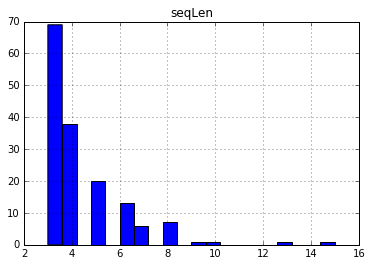

In [301]:
seq_stats[seq_stats['seqLen'] > 2].hist(bins=20)

In [ ]:
def extract_seq(seqid, seq_all):
    seqi = seq_all[seq_all['seqID'] == seqid].copy()
    seqi.sort_values(by=['arrivalTime'], ascending=True, inplace=True)
    return seqi['poiID'].tolist()

In [ ]:
def calc_poi_info(seqid_set, seq_all, poi_all):
    poi_info = seq_all[seq_all['seqID'].isin(seqid_set)][['poiID', 'poiDuration(sec)']].copy()
    poi_info = poi_info.groupby('poiID').agg([np.mean, np.size])
    poi_info.columns = poi_info.columns.droplevel()
    poi_info.reset_index(inplace=True)
    poi_info.rename(columns={'mean':'avgDuration(sec)', 'size':'popularity'}, inplace=True)
    poi_info.set_index('poiID', inplace=True)
    poi_info['poiTheme'] = poi_all.loc[poi_info.index, 'poiTheme']
    poi_info['poiLon'] = poi_all.loc[poi_info.index, 'poiLon']
    poi_info['poiLat'] = poi_all.loc[poi_info.index, 'poiLat']
    return poi_info.copy()